# Instacart Basket Predictions - EDA Notebook

## Business Overview

- **Stakeholder:**
Instacart
- **Business Problem:**
Create a model that uses this anonymized data on customer orders over time to predict which previously purchased products will be in a user’s next order

## Data Understanding

In [1]:
# Imports

import numpy as np
import scipy
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Read in  data

orders = pd.read_csv('./data/orders.csv') 
orders_train = pd.read_csv('./data/order_products__train.csv')
orders_prior = pd.read_csv('./data/order_products__prior.csv')
products = pd.read_csv('./data/products.csv')
aisles = pd.read_csv('./data/aisles.csv')
depts = pd.read_csv('./data/departments.csv')

## Data Exploration

In [5]:
orders.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [6]:
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [7]:
orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [8]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [9]:
orders_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
orders_prior.nunique()

order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
dtype: int64

In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
# Merging  products + aisles + department into one df 

product_df = products.merge(aisles, how='left', left_on = 'aisle_id', right_on = 'aisle_id')

In [13]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [14]:
# Adding in departments 

product_df = product_df.merge(depts, how='left', left_on='department_id', right_on='department_id')

In [15]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
 4   aisle          49688 non-null  object
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


*order_products_prior give the order information of all users in the history. order_products_train give the current order information of some users. You need to predict the current order of rest of users.*


In [16]:
# Inner join orders and orders_prior

priors = orders.merge(orders_prior,on='order_id',how='inner')

priors

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0


In [17]:
priors.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07,3.035642e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,1.029372e+05,1.714205e+01,2.738818e+00,1.342498e+01,1.110407e+01,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,5.946648e+04,1.753504e+01,2.090049e+00,4.246365e+00,8.778914e+00,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,5.142100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00


In [18]:
priors = priors.merge(product_df,how='left',left_on='product_id',right_on='product_id')

priors.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household


In [19]:
priors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  department              object 
dtypes: float64(1), int64(10), object(4)
memory usage: 3.9+ GB


In [20]:
priors.isna().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

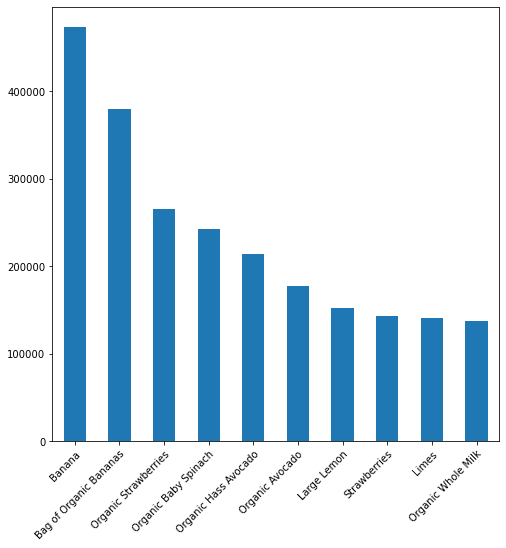

In [77]:
fig, ax = plt.subplots(figsize=(8,8))


priors['product_name'].value_counts().head(10).plot(ax=ax, kind='bar')

plt.xticks(rotation = 45,ha='right', rotation_mode='anchor');

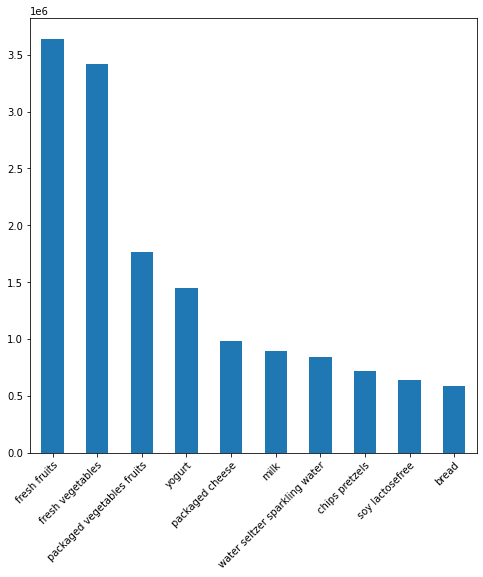

In [78]:
fig, ax = plt.subplots(figsize=(8,8))


priors['aisle'].value_counts().head(10).plot(ax=ax, kind='bar')

plt.xticks(rotation = 45,ha='right', rotation_mode='anchor');

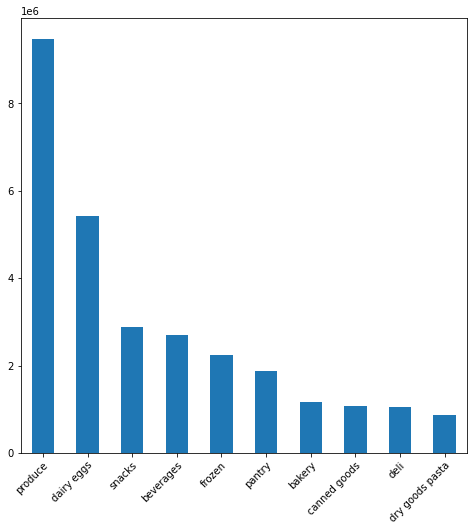

In [76]:
fig, ax = plt.subplots(figsize=(8,8))

priors['department'].value_counts().head(10).plot(ax=ax, kind='bar')
plt.xticks(rotation = 45,ha='right', rotation_mode='anchor');

In [81]:
priors['order_id'].nunique()

3214874

In [82]:
priors['user_id'].nunique()

206209

In [86]:
priors['order_dow'].value_counts()

0    6209666
1    5665856
6    4500304
2    4217798
5    4209533
3    3844117
4    3787215
Name: order_dow, dtype: int64

In [87]:
# Most frequen order days are Sunday, Monday & Saturday 

In [88]:
priors['order_hour_of_day'].value_counts()

10    2764426
11    2738582
14    2691548
15    2664533
13    2663292
12    2620847
16    2537458
9     2456713
17    2089465
8     1719973
18    1637923
19    1259401
20     977038
7      891937
21     796370
22     634734
23     402620
6      290795
0      218948
1      115786
5       88062
2       69434
4       53283
3       51321
Name: order_hour_of_day, dtype: int64

In [89]:
# Most frequent order times tend to be in the morning/early afternoon. This makes sense as most people want to 
# get the groceries delivered when they get home 